In [141]:
import pandas as pd
import re # re.search etc. regular expressions

Create the Reference Table:
Create a DataFrame that defines your categories, subcategories, and corresponding descriptions.

In [142]:
# Reference table for categories and subcategories
# ???? CENTER FOR INTUITIVE P WARREN OH
# ???? BEACHWOOD PLACE, OH-HC BEACHWOOD OH
categories_data = {
    # INCOME TAXES FEES ETC EXCLUDE PAYMENTS
    'Income': {
        'Anita Income': ['ZELLE DEP ANITA'],
        'Fidelity Transfer': ['FID '],
        'KeyBank Cash-Back': ['KEY REWARDS', 'GIFT FROM KEY BANK']
    },
    'Taxes': {
        'Taxes': ['TAXREFUND', ' IRS ', 'TAX REF', 'RITA']
    },
    'Fees': {
        'Transaction Fees': ['TRANSACTION FEE']
    },
    'EXCLUDE': {
        'Visa Payment': ['INTERNET TRF TO CCA'],
        'Visa Payment Received': ['PAYMENT ']
    },
    # PRESUMABLY CHECKING ACCT
    'Housing': {
        'Mortgage': ['WFHM'],
        'Bills n Utilities': ['VERIZON', 'VZWRLSS', 'DOMINION', 'FIRST ENERGY', 'NORTHEAST OHIO', 'CLEVELAND HEIGHTS', 'ENBRIDGE GAS', 'ATT ', 'NEORSD', 'CWD']
    },
    'Healthcare': {
        'Medical Insurance': ['MEDICARE', 'VSP', 'UNITEDHEALTHCARE', 'ROCKWELL', 'AARP HEALTH', 'DELTA DENTAL'],
         # CLEVELAND KIDNEY & HYP - tomek's kidney USG ?
        'Medical and Dental': ['PEDIATRICS', 'CLEVELAND CLINIC', 'METROHEALTH', 'WESTERN RESERVE PERIO', 'HILLCREST ', 'CLEVELAND KIDNEY '],
        'Pharmacy': ['CVS', 'WALGREENS']
    },
    'Education': {
        'College Tuition': ['SMARTPAYCIA', 'CASHNET', 'CAMPUS CIA', 'BURREN', 'COLLEGE'],
        'Art Supplies': ['UTRECHT', ' ART ']
    },
    'Professional': {
        'Professional Fees': ['LICENSURE', 'LICENSE'],
        'Liability Insurance': ['CPH LIABILITY']
    },
    # PRESUMABLY CREDIT CARD
    'Transportation': {
        'Gas': ['SUNOCO', 'BP', 'SHELL', 'MARATHON', 'CIRCLE K', 'SHEETZ', 'GAS'],
        'Car Maintenance': ['REPAIR', 'AUTO', 'BODY', 'QUALITY AUTO'],
        'Car Registration' : ['BUREAU MOTOR VE'],
        'Car Insurance': ['LIBERTY MUTUAL']
    },
    'Food': {
        'Groceries': ['GROCERY', 'HEINEN', 'DAVE', 'WHOLE', 'SODA', 'TRADE'],
        'Dining Out': ['TAVERN', 'TOMMYS', 'CAFE', 'WASABI', 'PACIFIC', 'ANATOLIA', 'BATUQUI', 'PHO', 'LAKE HOUSE', 'DEWEY',\
                        'MAROTTA ', 'BANANA', 'BANGKOK', 'HIBACHI', 'BRASSICA', 'RESTAUR', 'BUFFALO', 'COZUMEL', 'FIRST WATCH',\
                            'PARADISE BIRYANI', 'CARIBOU COFFEE', 'STONE OVEN', 'SEOUL GARDEN ', 'YOURS TRULY', 'LOCKKEEPERS' ],
        'Fast Food': ['LEFTY', 'SHAKE SHACK', 'SHAKESHACK', 'WENDY', 'BUDDA', 'CILANTRO', 'PANERA', 'CHIPOTLE', 'BIBIBOP', 'ROGERS', 'PIADA',\
                      'ZINA', 'SUBSHOPPE', 'NATURES OASIS', 'LOTUS EXPRESS', 'BRUEGGERS '],
        'World Food': ['KRAKOW', 'NIPA HUT', 'YELESEYEVSKY'],
        'Why DOORDASH?': ['DOORDASH']
    },
    'Selfcare & Wellbeing': {
        'Aikido n Yoga': ['CHECK', ' YOGA'], 
        'Beauty n Supplies': ['LADIES', 'BATH', 'SALLY BEAUTY', 'AVEDA', 'LUSH BEACHWOOD', 'AIKIKAI', 'AIKIDO', 'ATMA', 'PADDLE'],
        'Sound Bath': ['PAYPAL INST'], # ?????
    },
    'Home & Garden': {
        'House Maintenance': ['HOME DEPOT'],
        'Furnishing': ['WORLD', 'REFURNISHING', 'KOALA', 'WAYFAIR'],
        'Garden': ['BREMEC', 'LANDSCAPE', 'STUMP', 'NATURE CENTER']
    },
    'Subscriptions': {
        'Subscription': ['SPOTIFY', 'APPLE', 'NETFLIX', 'AUDIBLE', 'PEACOCK', 'WALL', 'BITDEFENDER', 'MICROSOFT', 'HULU', 'NYTIMES', 'IDEASTREAM', 'WSJ']
    },
    'Shopping': {
        'Amazon': ['AMAZON', 'AMZN'],
        'Department Store': ['TARGET', 'MACY'],
        # BEACHWOOD PLACE, OH-HC BEACHWOOD OH =? Ann Taylor store in beachwood place
        'Clothes': ['REI', 'NORDSTROM', 'DICK', 'DSW', 'AVALON', 'MARSHALLS', 'ANN TAYLOR', 'AMERICAN EAGLE', 'FOOTWEAR', 'H&M ', 'OLD NAVY '],
        'Kindle n Books': ['KINDLE', 'AUDIOTEKA', 'LOGANBERRY', 'MAC\'S', 'EMPIK'],
        # SERIF.COMBILL MINNETONKA MN = AFFINITY GRAPHICS SOFTWARE
        # SIMON HAYNES T AIAT PAYPAL = SpaceJock Writing software
        'Software n Accessories': ['SIMON HAYNES', 'ALISTORE', 'GOOGLE', 'FLIXEASY', 'CLIP STUDIO', 'ALIEXPRESS', 'SERIF.COMBILL MINNETONKA MN'],
        # LOTUS FLOWER LLC = flowers to Poland
        'Gifts': ['FIDDLEHEAD', 'PASSPORT', 'DIAMONDS FLOWERS', 'BUNDT', 'ALL CITY CANDY', 'LOTUS FLOWER LLC', 'PINKBLUSHMATERNIT',\
                  'LITTLE ROOM ', 'CRAFT COLLECTIVE'],
        # THE CHILDRENS PLACE 42 BEACHWOOD OH 
        # THECHILDRENSPLACE.COM SECAUCUS NJ
        'Kids Toys': ['PLAYMATTERS', 'DISNEYSTORE', 'CHILDRENS PLACE', 'THECHILDRENSPLACE.COM' ],
        'Cycling n Paddling' : ['BIKES', 'IROCKER']
    },
    'Pets': {
        'Cat Food n Supplies': ['PET', 'CHEWY', 'HOLLYWOOD FEED', 'JACKSON GALAXY'],
        'Cat Health': ['VETERINARY']
    },
    # ENTERTAINMENT n GIFTS
            # MOVIES THEATER COMPUTER GAMES BIRTHDAY CAKES BDAY DINNERS ETC
            # NOTE: CLEVELAND INSTITUTE OF CLEVELAND ==== CIA CINEMATEQUE
            # MUSEUM ===== includes THE CHILDRENS MUSEUM O CLEVELAND OH 
            # GREATER CLEVELAND AQUA ==== CLEVELAND AQUARIUM
            # MANGO MANGO DESSE CLEVELAND ===== mango mango dessert Sof's birthday with Felix
            # DIAMONDS FLOWERS ========= flower shop Coventry
    'Entertainment': {
        # METROPARKS FARMPA KIRTLAND - Farm Park Kirtland w Kiddos
        'Fun Out': ['CLEVELAND MUSEUM OF AR', 'GREATER CLEVELAND AQUA', 'METROPARKS FARMPA KIRTLAND', 'MITCHELL',\
                                      'SWEET FIX', 'MANGO MANGO DESSE',\
                                          'ON THE RISE', 'RISING STAR COFFEE', 'STARBUCKS', 'MICHAELS', 'UPTOWN MART', 'ELLIE-MAYS', '6 FLAVORS INDIAN', 'LUXE KITCHEN'],
        'Movies n Theater': ['VUDU', 'FANDANGO', 'DOBAMA','THEAT', 'CLEVELAND PUBLIC', 'CLEVELAND INSTITUTE OF CLEVELAND',\
                                   'MOVIE', 'PRIME VIDEO', 'BORDERLIGHT', 'CINEMA'],
        'Music n Games': ['STEAMGAMES', 'BANDCAMP'],
        # Cleveland Museum Cleveland OH - Cleveland Museum of Art membership
        'Memberships': ['Cleveland Museum Cleveland OH']
    },
    # PY *PCRF LOS ANGELES CA - Palestine children relief fund ??? 
    'Miscellaneous': {
        'Political Donations': ['ACTBLUE'],
        'ATM Wthdrw n Dpsit' : ['ATM '],
        'Vending Machines' : ['VENDING ', 'PEPSIVEN'],
        'Parcels' : ['USPS ']
    },
    # EXCEPTIONS - PROCESS LAST
    'Vacations n Travel': {
        # HNDISCOVER ST728 CLEVELAND OH = Hopkins airport  
        # Espresso House 7187 Kastrup DNK = Copenhagen Airport
        'Air Travel': ['LOT ', 'AMERICAN', 'EXPEDIA', 'SAS ', 'EAT AND GO JAMAICA', ' Kastrup', 'HUDSONNEWS ', 'HUDSON',\
                       'HNDISCOVER', 'JFK ', 'MIDTOWN BISTRO', 'TST* ', 'CURRITO '],
        'Visiting Grandma Ela': ['PLUSKI', 'OLSZTYN', 'WARSZAWA', re.compile(r' POL$'), re.compile(r' CHICAGO IL$')],
        'Vacation SC': ['FOLLY', 'VIATORTRIPADVISOR', 'VACASA', 'VRBO', re.compile(r' SC$'), re.compile(r' NC$'), re.compile(r' WV$')],
        'Visiting Wanda': [re.compile(r' VA$'), re.compile(r' GA$'), re.compile(r' MD$')],
        'Visiting Eva': ['PITTSBURGH', 'TURNPIKE', re.compile(r' PA$')]
    },
}

In [143]:
# Define your categories with their display order and custom colors in a single array
categories_order_and_colors = [
    ('Income', '#D3D3D3'),  # Light Gray
    ('Housing', '#2ca02c'),  # Green
    ('Healthcare', '#FFFF00'),  # Yellow
    ('Food', '#1f77b4'),  # Blue
    ('Subscriptions', '#E6E6FA'),  # Lavender
    ('Transportation', '#708090'),  # Slate Gray
    ('Selfcare & Wellbeing', '#FFC0CB'),  # Pink
    ('Shopping', '#FF6666'),  # Light Red
    ('Home & Garden', '#FFA500'),  # Orange
    ('Pets', '#8A2BE2'),  # Violet
    ('Entertainment', '#FF00FF'),  # Magenta
    ('Professional', '#FF8C00'),  # Dark Orange
    ('Taxes', '#696969'),  # Dim Gray
    ('Education', '#800080'),  # Purple
    ('Vacations n Travel', '#8B0000'),  # Dark Red
    ('Fees', '#FF0000'),  # Red
    ('Uncategorized', '#000000')  # Black
]

# Unzip the array to get the display order and colors as separate lists
display_order, colors = zip(*categories_order_and_colors)

Verify Integrity of categories definition

In [144]:

def find_all_duplicates_and_substrings(data):
    subcategory_seen = set()
    keyword_seen = set()
    duplicate_subcategories = set()
    duplicate_keywords = set()
    substring_subcategories = set()
    substring_keywords = set()

    # Collect all subcategories and keywords first
    all_subcategories = []
    all_keywords = []

    for category, subcategories in data.items():
        for subcategory, keywords in subcategories.items():
            all_subcategories.append(subcategory)
            for keyword in keywords:
                if isinstance(keyword, re.Pattern):
                    all_keywords.append(keyword.pattern)
                else:
                    all_keywords.append(keyword)

    # Check for duplicate and substring subcategories
    for i, subcategory in enumerate(all_subcategories):
        for j, other_subcategory in enumerate(all_subcategories):
            if i != j:
                # Check for duplicates
                if subcategory == other_subcategory:
                    duplicate_subcategories.add(subcategory)
                # Check for substrings
                if subcategory in other_subcategory or other_subcategory in subcategory:
                    substring_subcategories.add((subcategory, other_subcategory))

    # Check for duplicate and substring keywords
    for i, keyword in enumerate(all_keywords):
        for j, other_keyword in enumerate(all_keywords):
            if i != j:
                # Check for duplicates
                if keyword == other_keyword:
                    duplicate_keywords.add(keyword)
                # Check for substrings
                if keyword in other_keyword or other_keyword in keyword:
                    substring_keywords.add((keyword, other_keyword))

    return duplicate_subcategories, duplicate_keywords, substring_subcategories, substring_keywords

In [145]:
# Find duplicates and substrings in categories_data
duplicate_subcategories, duplicate_keywords, substring_subcategories, substring_keywords = find_all_duplicates_and_substrings(categories_data)

# Print the results
print("Duplicate Subcategories:")
print(duplicate_subcategories if duplicate_subcategories else "None")

print("\nDuplicate Keywords:")
print(duplicate_keywords if duplicate_keywords else "None")

print("\nSubstring Subcategories:")
print(substring_subcategories if substring_subcategories else "None")

print("\nSubstring Keywords:")
print(substring_keywords if substring_keywords else "None")

Duplicate Subcategories:
None

Duplicate Keywords:
None

Substring Subcategories:
{('Visa Payment', 'Visa Payment Received'), ('Visa Payment Received', 'Visa Payment')}

Substring Keywords:
{('AUTO', 'QUALITY AUTO'), ('HUDSONNEWS ', 'HUDSON'), ('AMERICAN', 'AMERICAN EAGLE'), ('HUDSON', 'HUDSONNEWS '), ('AMERICAN EAGLE', 'AMERICAN'), ('ENBRIDGE GAS', 'GAS'), ('GAS', 'ENBRIDGE GAS'), ('QUALITY AUTO', 'AUTO')}


In [146]:
# Convert the hierarchical dictionary into a DataFrame for easier processing
categories_list = []
for category, subcategories in categories_data.items():
    for subcategory, keywords in subcategories.items():
        categories_list.append({'Category': category, 'Subcategory': subcategory, 'DescriptionKeywords': keywords})

categories_df = pd.DataFrame(categories_list)

print(categories_list)
print(categories_df)

[{'Category': 'Income', 'Subcategory': 'Anita Income', 'DescriptionKeywords': ['ZELLE DEP ANITA']}, {'Category': 'Income', 'Subcategory': 'Fidelity Transfer', 'DescriptionKeywords': ['FID ']}, {'Category': 'Income', 'Subcategory': 'KeyBank Cash-Back', 'DescriptionKeywords': ['KEY REWARDS', 'GIFT FROM KEY BANK']}, {'Category': 'Taxes', 'Subcategory': 'Taxes', 'DescriptionKeywords': ['TAXREFUND', ' IRS ', 'TAX REF', 'RITA']}, {'Category': 'Fees', 'Subcategory': 'Transaction Fees', 'DescriptionKeywords': ['TRANSACTION FEE']}, {'Category': 'EXCLUDE', 'Subcategory': 'Visa Payment', 'DescriptionKeywords': ['INTERNET TRF TO CCA']}, {'Category': 'EXCLUDE', 'Subcategory': 'Visa Payment Received', 'DescriptionKeywords': ['PAYMENT ']}, {'Category': 'Housing', 'Subcategory': 'Mortgage', 'DescriptionKeywords': ['WFHM']}, {'Category': 'Housing', 'Subcategory': 'Bills n Utilities', 'DescriptionKeywords': ['VERIZON', 'VZWRLSS', 'DOMINION', 'FIRST ENERGY', 'NORTHEAST OHIO', 'CLEVELAND HEIGHTS', 'ENBRID

Function to Categorize Transactions:
Create a function that uses the reference table to categorize transactions based on the description.

In [147]:
# Using iterrows() to iterate over rows
for index, row in categories_df.iterrows():
    print(f"Index: {index}")
    print(f"Row: {row}")

Index: 0
Row: Category                          Income
Subcategory                 Anita Income
DescriptionKeywords    [ZELLE DEP ANITA]
Name: 0, dtype: object
Index: 1
Row: Category                          Income
Subcategory            Fidelity Transfer
DescriptionKeywords               [FID ]
Name: 1, dtype: object
Index: 2
Row: Category                                          Income
Subcategory                            KeyBank Cash-Back
DescriptionKeywords    [KEY REWARDS, GIFT FROM KEY BANK]
Name: 2, dtype: object
Index: 3
Row: Category                                           Taxes
Subcategory                                        Taxes
DescriptionKeywords    [TAXREFUND,  IRS , TAX REF, RITA]
Name: 3, dtype: object
Index: 4
Row: Category                            Fees
Subcategory             Transaction Fees
DescriptionKeywords    [TRANSACTION FEE]
Name: 4, dtype: object
Index: 5
Row: Category                             EXCLUDE
Subcategory                     Visa Payment


In [148]:
def categorize_transaction(description, categories_df):
    description_upper = description.upper() 
    for index, row in categories_df.iterrows():
        for keyword in row['DescriptionKeywords']:
            if isinstance(keyword, str) and keyword in description_upper:
                return row['Category'], row['Subcategory']
            elif isinstance(keyword, re.Pattern) and keyword.search(description_upper):
                return row['Category'], row['Subcategory']
    return 'Uncategorized', 'Uncategorized'

In [149]:
def load_and_append(file_path, current_df):
    """
    Load an Excell file and append its content to the current DataFrame.

    Parameters:
    - file_path: str, the path to the new file
    - current_df: pd.DataFrame, the current DataFrame

    Returns:
    - pd.DataFrame, the updated DataFrame with the new data appended
    """
    # Load the new DataFrame from the Excell file
    new_df = pd.read_excel(file_path)

    # Append the new DataFrame to the current DataFrame
    updated_df = pd.concat([current_df, new_df], ignore_index=True)

    return updated_df

In [150]:
def load_expenses(year_month):
    # Load the CSV files with credit card and checking card records
    creditcard_filename = year_month + '-A&T-CCard.xlsx'
    checking_filename = year_month + '-A&T-CheckingAcct.xlsx'

    df_credit = pd.read_excel(creditcard_filename)
    df_checking = pd.read_excel(checking_filename)
    print(df_credit.head())
    print(df_checking.head())

    # Check the first few rows to understand the structure of your data.
    df = pd.concat([df_checking, df_credit], ignore_index=True)
    df.head()
    return df

In [151]:
months_to_process = ['2024-06','2024-07', '2024-08', '2024-09','2024-10','2024-11','2024-12','2025-01']

df  = pd.DataFrame()

for month in months_to_process : 
    df_month = load_expenses(month)
    df = pd.concat([df, df_month], ignore_index=True)

# Extract the year from the first month in the list
year = months_to_process[0][:4]

# Extract the months from each entry in the list
months = [month[5:] for month in months_to_process]

# Concatenate the year and the months together in the desired format
# Join the list of months into a single string
months_string = "-".join(months)

# Create the final result string
result_string = f"{year}-{months_string}"
output_datafile_expenses = result_string + '-A&T-EXPENSES.xlsx'
output_datafile_summary = result_string + '-A&T-SUMMARY.csv'
output_datafile_summary_w_subcats = result_string + '-A&T-SUMMARY-W-SUBCATS.csv'
categorized_expenses_filename = result_string + '-A&T-CATEGORIZED.csv'

print(output_datafile_summary)
print(categorized_expenses_filename)

        Date  Amount                             Description  Ref.#
0 2024-06-27  -29.16  PASSPORT TO PERU(CLEVE CLEVELAND HEIOH   6089
1 2024-06-27  -50.66  DAVE'S SUPERMARKET #22 CLEVELAND HTSOH   6089
2 2024-06-27   -4.85                NC QUICK PASS RALEIGH NC   4123
3 2024-06-27  -23.98  TST* LEFTY'S CHEESESTE CLEVELAND HEIOH   4123
4 2024-06-26  -32.39          VUDU.COM FANDANGO SUNNYVALE CA   4123
        Date   Amount                                  Description  Ref.#
0 2024-06-28   -14.00                   VSP INSURANCE COCORP PYMNT    NaN
1 2024-06-27  -197.11                     VERIZON WIRELESSPAYMENTS    NaN
2 2024-06-27   -66.04                                  CWD WEB PAY    NaN
3 2024-06-27 -1408.78            BILL PAY:WFHM 708 057939 QB51J2TV    NaN
4 2024-06-25  -141.89  BILL PAY:NORTHEAST OHIO REG 694491 WBP1W2TV    NaN
        Date  Amount                             Description  Ref.#
0 2024-07-30  -11.99                   SPOTIFY 8777781161 NY   4123
1 2024-07-28

In [152]:
# df = load_and_append('2024-10-A&T-CCard.xlsx', df)
# df = load_and_append('2024-10-A&T-CheckingAcct.xlsx', df)
# df = load_and_append('2024-11-A&T-CCard.xlsx', df)
# df = load_and_append('2024-11-A&T-CheckingAcct.xlsx', df)
# df = load_and_append('2024-12-A&T-CCard.xlsx', df)
# df = load_and_append('2024-12-A&T-CheckingAcct.xlsx', df)

Categorize the transactions:

Add a new column for categories. You can create a function to categorize transactions based on the description or other columns.

In [161]:

# Apply the function to categorize transactions
df[['Category', 'Subcategory']] = df['Description'].apply(lambda x: pd.Series(categorize_transaction(x, categories_df)))

# Filter out rows with 'EXCLUDE' category
filtered_df = df[df['Category'] != 'EXCLUDE']

# Convert the 'Category' column to a categorical type with the custom order
# Reorder the columns in the DataFrame according to the desired order
filtered_df['Category'] = pd.Categorical(filtered_df['Category'], categories=display_order, ordered=True)
# Reorder the columns in the DataFrame according to the desired order


sorted_df = filtered_df.sort_values(by=['Category', 'Subcategory'])
# Print the categorized DataFrame
print(sorted_df)

sorted_df.to_csv(categorized_expenses_filename)

          Date   Amount                          Description   Ref.# Category  \
5   2024-06-25  1800.00  ZELLE DEP ANITA S DACANAY UB1152IOC     NaN   Income   
10  2024-06-18  3500.00  ZELLE DEP ANITA S DACANAY OBV1L2MVC     NaN   Income   
117 2024-07-31  3000.00  ZELLE DEP ANITA S DACANAY JBQ1EDANC     NaN   Income   
126 2024-07-16  3500.00  ZELLE DEP ANITA S DACANAY 6BP1CDTHC     NaN   Income   
252 2024-08-27  3000.00  ZELLE DEP ANITA S DACANAY LB81M3YGC     NaN   Income   
..         ...      ...                                  ...     ...      ...   
509 2024-10-18    -3.85       FIRELANDS VENDING CLEVELAND OH  4123.0      NaN   
510 2024-10-18    -2.10       FIRELANDS VENDING CLEVELAND OH  4123.0      NaN   
512 2024-10-17    -6.85       FIRELANDS VENDING CLEVELAND OH  4123.0      NaN   
513 2024-10-17    -4.10       FIRELANDS VENDING CLEVELAND OH  4123.0      NaN   
518 2024-10-16   -10.45       FIRELANDS VENDING CLEVELAND OH  4123.0      NaN   

          Subcategory YearM

/tmp/ipykernel_5796/4048217517.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Category'] = pd.Categorical(filtered_df['Category'], categories=display_order, ordered=True)


Convert the date column to datetime:

Ensure the date column is in datetime format.

In [ ]:
# Convert the date column to datetime:
# Ensure the date column is in datetime format.

sorted_df['Date'] = pd.to_datetime(sorted_df['Date'])

#Group by month:
# Extract the month and year from the date column and group the data by these values.

sorted_df['YearMonth'] = sorted_df['Date'].dt.to_period('M')

# Summarize expenses by category for each month
monthly_expenses = sorted_df.groupby(['YearMonth', 'Category'])['Amount'].sum().unstack().fillna(0)

# Transpose the DataFrame
monthly_expenses_summary = monthly_expenses.T

# Reset index to make 'Category' a column
monthly_expenses_summary = monthly_expenses_summary.reset_index()

# Rename columns for clarity
monthly_expenses_summary.columns.name = None

# Print the final DataFrame
print(monthly_expenses_summary)
monthly_expenses_summary.to_csv(output_datafile_summary, index=False)

KeyError: "None of [Index(['Income', 'Housing', 'Healthcare', 'Food', 'Subscriptions',\n       'Transportation', 'Selfcare & Wellbeing', 'Shopping', 'Home & Garden',\n       'Pets', 'Entertainment', 'Professional', 'Taxes', 'Education',\n       'Vacations n Travel', 'Fees', 'Uncategorized'],\n      dtype='object')] are in the [columns]"

### Create monthly subcategory summaries

In [155]:
# Assuming df is your DataFrame
# Step 1: Add 'YearMonth' column (assuming 'Date' is in datetime format)
df['YearMonth'] = df['Date'].dt.to_period('M')

# Step 2: Group by 'Category', 'Subcategory', and 'YearMonth', and sum 'Amount'
grouped_df = df.groupby(['Category', 'Subcategory', 'YearMonth'])['Amount'].sum().reset_index()

# Step 3: Pivot the table
pivot_table = grouped_df.pivot_table(index=['Category', 'Subcategory'], columns='YearMonth', values='Amount', fill_value=0)

# Reset the index to flatten the DataFrame
pivot_table = pivot_table.reset_index()

# Step 4: Calculate the total for each category and append it to the pivot table
category_totals = pivot_table.groupby('Category').sum().reset_index()
category_totals['Subcategory'] = '<<< TOTAL >>>'
output_data_with_subcategories = pd.concat([pivot_table, category_totals], ignore_index=True)

# Sort the DataFrame to have the totals at the end of each category
output_data_with_subcategories = output_data_with_subcategories.sort_values(by=['Category', 'Subcategory']).reset_index(drop=True)

# Step 5: Leave the category column blank for subcategories
output_data_with_subcategories.loc[output_data_with_subcategories['Subcategory'] != '<<< TOTAL >>>', 'Category'] = output_data_with_subcategories.loc[output_data_with_subcategories['Subcategory'] != '<<< TOTAL >>>', 'Category'].mask(output_data_with_subcategories['Category'].duplicated(), '')
# Print the final DataFrame
print(output_data_with_subcategories)

# Save the final DataFrame to CSV
output_data_with_subcategories.to_csv(output_datafile_summary_w_subcats, index=False)


YearMonth   Category            Subcategory  2024-06  2024-07   2024-08  \
0            EXCLUDE          <<< TOTAL >>>     0.00     0.00  -8110.97   
1                              Visa Payment -1000.00 -5752.65 -19306.17   
2                     Visa Payment Received  1000.00  5752.65  11195.20   
3          Education          <<< TOTAL >>> -3681.07 -9195.46      0.00   
4                           College Tuition -3681.07 -9195.46      0.00   
..               ...                    ...      ...      ...       ...   
66                               Air Travel  -393.07 -2485.28   -143.37   
67                              Vacation SC -2151.59     0.00      0.00   
68                             Visiting Eva    -7.25  -197.38    -15.20   
69                     Visiting Grandma Ela     0.00     0.00      0.00   
70                           Visiting Wanda  -777.13     0.00      0.00   

YearMonth  2024-09  2024-10  2024-11  2024-12  2025-01  
0             0.00     0.00 -5634.75 -3900

### Write output data to two sheets in an excell file

In [156]:
# Use ExcelWriter to write DataFrames to different sheets
with pd.ExcelWriter(output_datafile_expenses, engine='xlsxwriter') as writer:
    output_data_with_subcategories.to_excel(writer, sheet_name='Subcategories', index=False)
    monthly_expenses_summary.to_excel(writer, sheet_name='Categories', index=False)

Analyze and visualize the data:

You can now analyze the monthly expenses by category and create visualizations.

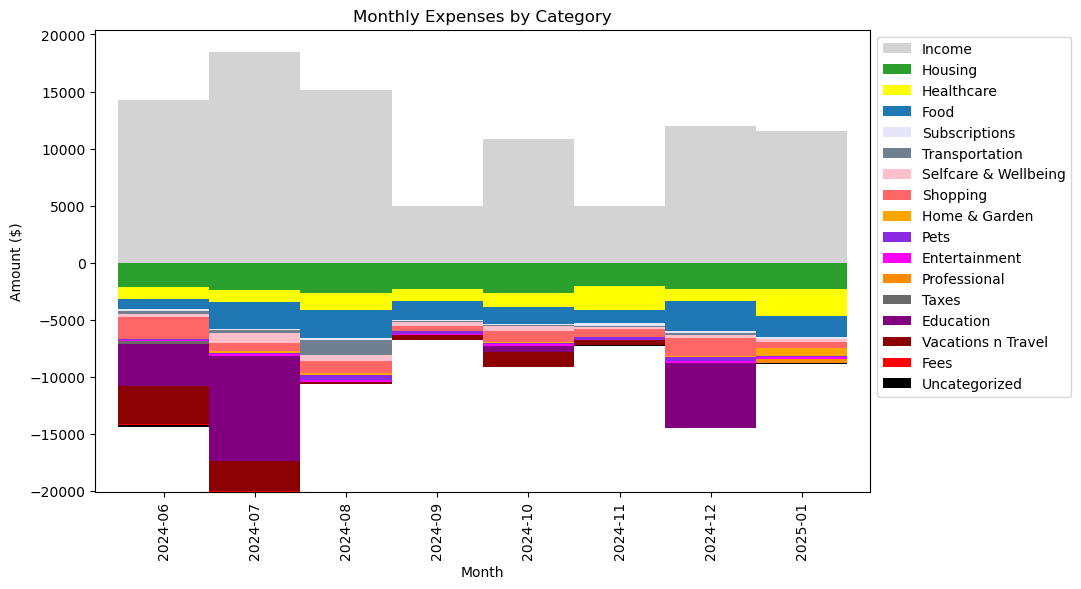

In [159]:
import matplotlib.pyplot as plt

# Reorder the columns in the DataFrame according to the desired order
monthly_expenses = monthly_expenses[list(display_order)]

# Plot monthly expenses by category
monthly_expenses.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, width=1)
plt.title('Monthly Expenses by Category')
plt.xlabel('Month')
plt.ylabel('Amount ($)')

# Move the legend to the best location
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
